In [1]:
from IPython.display import clear_output

In [2]:
%pip install accelerate
%pip install bitsandbytes

clear_output()

# Content

In this notebook, we will use the multi-model model llava.
Llava can take image along with text as input and can answer questions or chat about the image.

We'll use huggingface to download and infer the model

In [3]:
from transformers import LlavaNextProcessor, LlavaNextForConditionalGeneration
import torch
from PIL import Image
import requests

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"

### Downloading the model

In [ ]:
model_id = 'llava-hf/llava-v1.6-mistral-7b-hf'

processor = LlavaNextProcessor.from_pretrained(model_id)

model = LlavaNextForConditionalGeneration.from_pretrained(model_id,
                                                          torch_dtype=torch.float16,
                                                          low_cpu_mem_usage=True,
                                                          load_in_4bit=True)

### Let's try an image

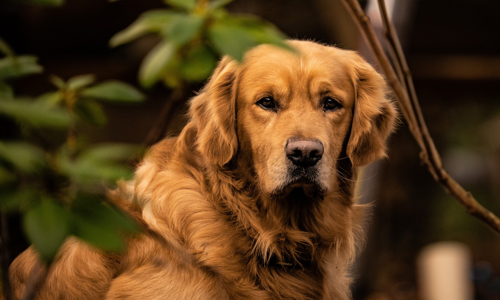

In [28]:
url = "https://cdn.pixabay.com/photo/2022/02/06/14/06/dog-6997211_1280.jpg"
image = Image.open(requests.get(url, stream=True).raw)

image = image.resize((500, 300))
image

In [29]:
prompt = """[INST] <image>\n Briefly summarize the contents of an image.
            Also explain the appearance of the main subject of the image. [/INST]"""

inputs = processor(prompt, image, return_tensors="pt").to(device)

In [30]:
with torch.no_grad():
    output = model.generate(**inputs, max_new_tokens=500)
print(processor.decode(output[0], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


### Let's try another

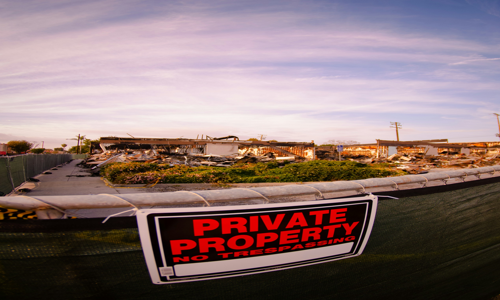

In [32]:
url = "https://images.unsplash.com/photo-1618504063109-5a9ba44df100?q=80&w=2536&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"
image = Image.open(requests.get(url, stream=True).raw)

image = image.resize((500, 300))
image

In [36]:
prompt = "[INST] <image> What's the main message in this image?[/INST]"

inputs = processor(prompt, image, return_tensors="pt").to(device)

with torch.no_grad():
    output = model.generate(**inputs, max_new_tokens=500)

print(processor.decode(output[0], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


[INST]   What's the main message in this image?[/INST] The main message in this image is that the area is private property and no trespassing is allowed. The sign is placed on a fence, which is a common way to indicate that the land is not open to the public. 


In [35]:
prompt = "[INST] <image> What color is the fence and what color is the text in the sign?[/INST]"

inputs = processor(prompt, image, return_tensors="pt").to(device)

with torch.no_grad():
    output = model.generate(**inputs, max_new_tokens=500)

print(processor.decode(output[0], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


[INST]   What color is the fence and what color is the text in the sign?[/INST] The fence in the image is green. The sign has red text. 
